In [3]:
'''1尺度小波变换'''
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt

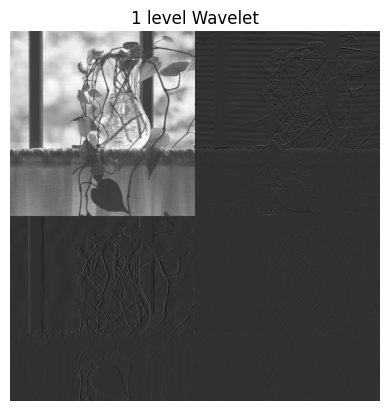

In [4]:
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\vase.tif",0)

img = np.array(img,dtype=float)

Result = pywt.dwt2(img,'haar')   # 观察图像的近似图像，（横向边缘特征，纵向边缘特征，对角特征）
                                 #dwt2函数第二个参数指定小波基
cA,(cH,cV,cD) = Result

# plt.figure(figsize=(10,10))
# plt.subplot(221),plt.imshow(cA,'gray'),plt.title('Approximate image'),plt.axis('off')
# plt.subplot(222),plt.imshow(cH,'gray'),plt.title('Horizontal features'),plt.axis('off')
# plt.subplot(223),plt.imshow(cV,'gray'),plt.title('Vertical features'),plt.axis('off')
# plt.subplot(224),plt.imshow(cD,'gray'),plt.title('Diagonal features'),plt.axis('off')
# plt.show()

#拼接子图
AH = np.concatenate([cA,cH],axis = 1)
VD = np.concatenate([cV,cD],axis = 1)
dst = np.concatenate([AH,VD],axis = 0)

#输出图像
plt.figure()
plt.imshow(dst,'gray')
plt.title('1 level Wavelet')
plt.axis('off')
plt.show()

In [5]:
pywt.wavelist()  #支持的小波基的列表

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

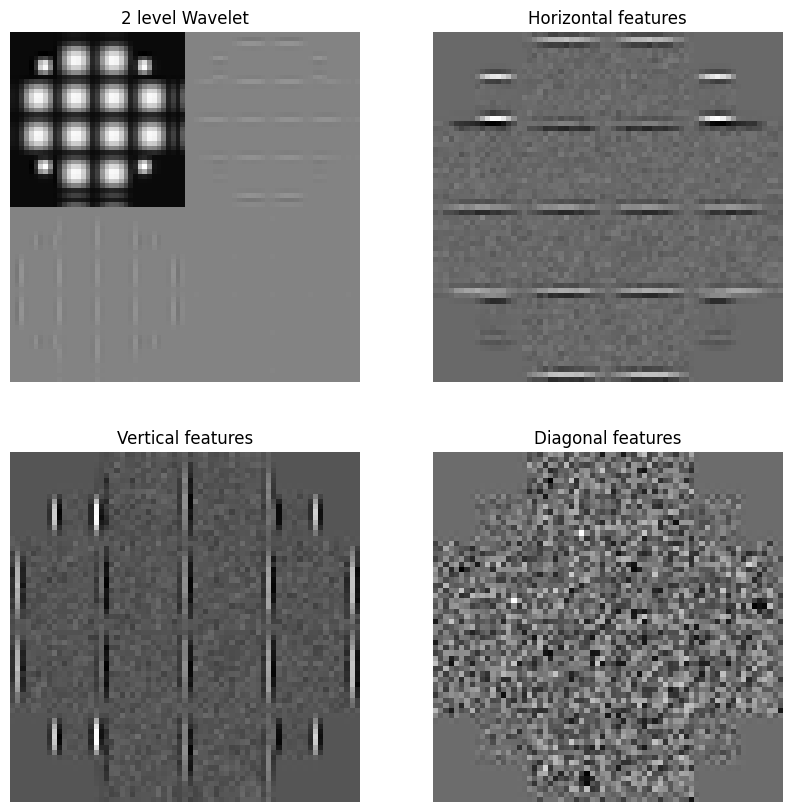

In [6]:
'''2尺度FWT'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\sinePulses.tif",0)
img = np.array(img,dtype=float)

Result = pywt.wavedec2(img, 'sym4', level=2)
''' data:    输入的数据
    wavelet: 小波基
    level:   尺度（要变换多少层）
    return： 返回的值要注意，每一层的高频都是包含在一个tuple中'''
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = Result

# 将每个子图的像素范围都归一化到与CA2一致  CA2 [0,255* 2**level]
AH2 = np.concatenate([cA2, cH2+510], axis=1)
VD2 = np.concatenate([cV2+510, cD2+510], axis=1)
cA1 = np.concatenate([AH2, VD2], axis=0)

plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(cA1,'gray'),plt.title('2 level Wavelet'),plt.axis('off')
plt.subplot(222),plt.imshow(cH1,'gray'),plt.title('Horizontal features'),plt.axis('off')
plt.subplot(223),plt.imshow(cV1,'gray'),plt.title('Vertical features'),plt.axis('off')
plt.subplot(224),plt.imshow(cD1,'gray'),plt.title('Diagonal features'),plt.axis('off')
plt.show()


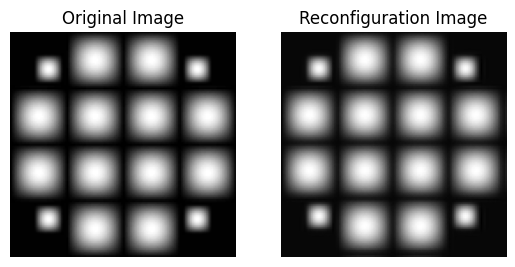

In [7]:
'''IDWT'''
# cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = Result
cA1 = pywt.idwt2((cA2,(cH2,cV2,cD2)),'sym4')
cA1 = cv2.resize(cA1, (67,67))
img_reshape = pywt.idwt2((cA1,(cH1,cV1,cD1)),'sym4')

plt.figure()
plt.subplot(121),plt.title('Original Image'),plt.imshow(img,'gray'),plt.axis('off')
plt.subplot(122),plt.title('Reconfiguration Image'),plt.imshow(img_reshape,'gray'),plt.axis('off')
plt.show()